In [161]:
import importlib

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from Beams import Pulse, Grating
from HHG import ActiveGrating
import Graph

Grating = Grating()


In [162]:
IR = Pulse(w0=50e-6, lam=800e-9, wt=20e-15)

#grid = IR.ST_Grid(Lx=1e-3, Ly=1e-3, Lt=100e-15, Nx=601, Ny=601, Nt=101)
grid = IR.Grid(Lx=1e-3, Ly=100e-15, Nx=1001, Ny=2001)
STOV = IR.LG_STOV(grid[0], 0, grid[1], l=1, p=0) # Axis0 = time, Axis1 = x

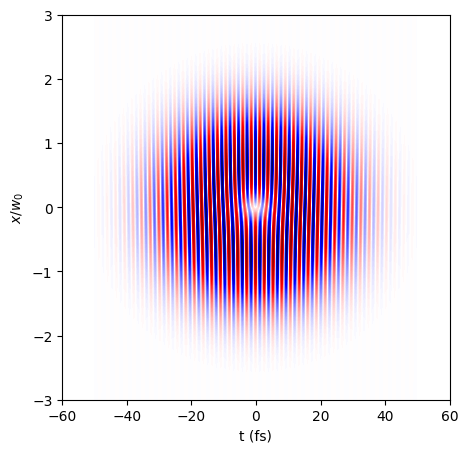

In [163]:
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(5,5))

x, t = grid[0][0], grid[1].T[0] # retrieve axes from meshgrid
x = x/IR.w0
t = t/1e-15
extent=[t[0], t[-1], x[0], x[-1]]

ax.imshow(np.real(STOV).T, cmap='seismic', aspect='auto', extent=extent)

ax.set_xlim(-3*IR.wt/1e-15, 3*IR.wt/1e-15)
ax.set_ylim(-3,3)

ax.set_xlabel('t (fs)')
ax.set_ylabel(r'$x/w_0$')

plt.show()

In [164]:
IRspectrum, xw_grid = Grating.Disperse(field_0=STOV, grid_xt=grid)

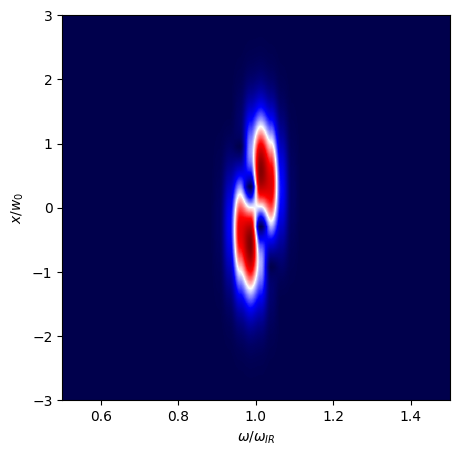

In [165]:
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(5,5))

x, w = xw_grid[0][0], xw_grid[1].T[0] # retrieve axes from meshgrid
x = x/IR.w0
w = w/IR.omega
extent=[w[0], w[-1], x[0], x[-1]]

ax.imshow(np.abs(IRspectrum).T, cmap='seismic', aspect='auto', extent=extent)

ax.set_xlim(0.5, 1.5)
ax.set_ylim(-3, 3)

ax.set_xlabel(r'$\omega/\omega_{IR}$')
ax.set_ylabel(r'$x/w_0$')

plt.show()

In [166]:
AG = ActiveGrating(qeff=3.5)
XUV_STOV = 0

for q in [11, 13, 15, 17, 19]:
    XUV_STOV += AG.Hq_NearField(IRfield=STOV, q=q)

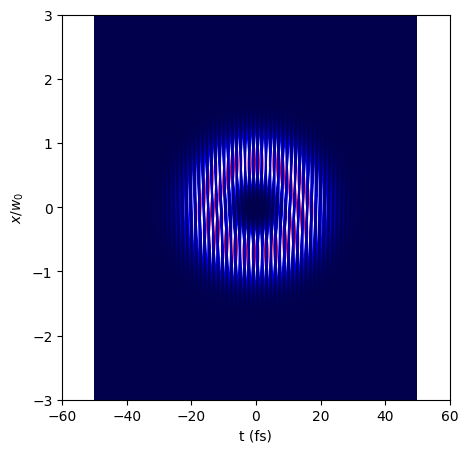

In [167]:
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(5,5))

x, t = grid[0][0], grid[1].T[0] # retrieve axes from meshgrid
x = x/IR.w0
t = t/1e-15
extent=[t[0], t[-1], x[0], x[-1]]

ax.imshow(np.abs(XUV_STOV).T, cmap='seismic', aspect='auto', extent=extent)

ax.set_xlim(-3*IR.wt/1e-15, 3*IR.wt/1e-15)
ax.set_ylim(-3, 3)

ax.set_xlabel('t (fs)')
ax.set_ylabel(r'$x/w_0$')

plt.show()

In [168]:
XUVspectrum, xw_grid = Grating.Disperse(field_0=XUV_STOV, grid_xt=grid)


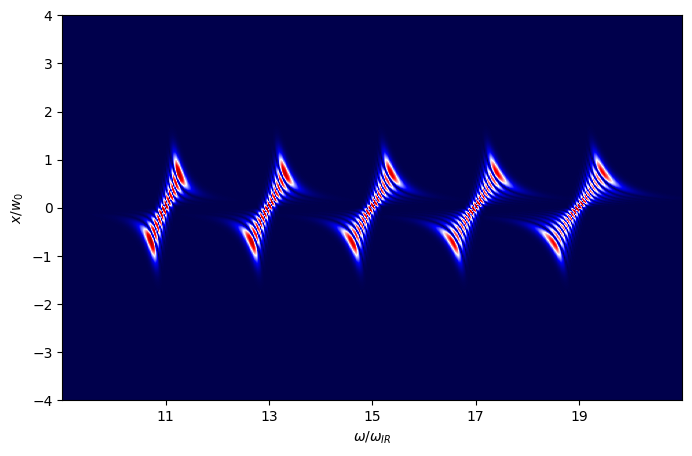

In [169]:
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(8,5))

x, w = xw_grid[0][0], xw_grid[1].T[0] # retrieve axes from meshgrid
x = x/IR.w0
w = w/IR.omega
extent=[w[0], w[-1], x[0], x[-1]]

ax.imshow(np.abs(XUVspectrum).T, cmap='seismic', aspect='auto', extent=extent)

ax.set_xlim(9, 21)
ax.set_ylim(-4, 4)

ax.set_xlabel(r'$\omega/\omega_{IR}$')
ax.set_ylabel(r'$x/w_0$')

ax.set_xticks([11, 13, 15, 17, 19], [11, 13, 15, 17, 19])

plt.show()

In [170]:
x, w = xw_grid[0][0], xw_grid[1].T[0] # retrieve axes from meshgrid
Lx, Lw = x[-1]-x[0], w[-1]-w[0]
Nx, Nw = len(x), len(w)

test = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(XUVspectrum, axes=1), axis=1), axes=1)
test = test * (Lx/(Nx-1))
d=1
xp = np.fft.fftshift(np.fft.fftfreq(Nx, Lx/(Nx-1)))*d
lam_axis = 2*np.pi*3e8/w

for i in range(len(test)):
    test[i] = np.interp(xp*lam_axis[0], xp*lam_axis[i], test[i]) / lam_axis[i] 

C:\Users\tg263331\AppData\Local\Temp\ipykernel_3532\1955932188.py:9: RuntimeWarning: divide by zero encountered in divide
  lam_axis = 2*np.pi*3e8/w
C:\Users\tg263331\AppData\Local\Temp\ipykernel_3532\1955932188.py:12: RuntimeWarning: invalid value encountered in multiply
  test[i] = np.interp(xp*lam_axis[0], xp*lam_axis[i], test[i]) / lam_axis[i]


c:\Users\tg263331\Anaconda3\envs\test_env\lib\site-packages\numpy\lib\function_base.py:2411: RuntimeWarning: invalid value encountered in hls_to_rgb (vectorized)
  outputs = ufunc(*inputs)


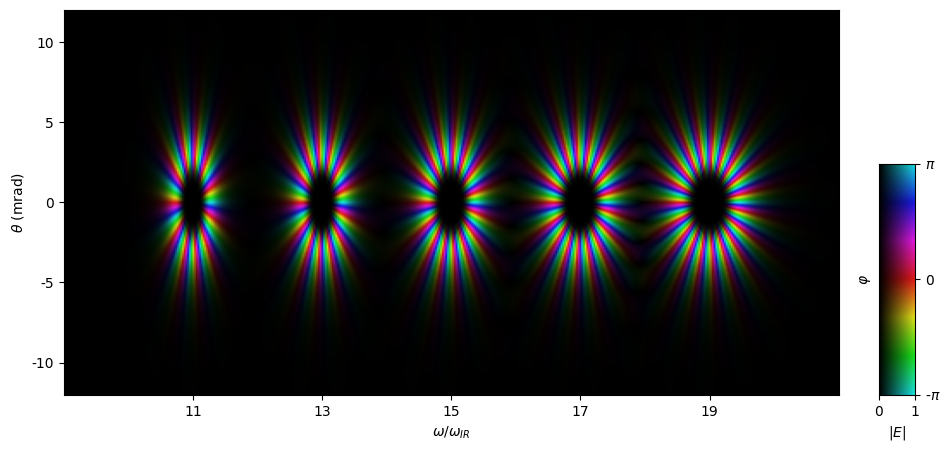

In [171]:
importlib.reload(Graph)


%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(10,5))

x, w = xp*lam_axis[0], xw_grid[1].T[0]
x = x*1e3
w = w/IR.omega
extent=[w[0], w[-1], x[0], x[-1]]


im = Graph.Phase2D().colorize(test.T)
amp, phase, key = Graph.Phase2D().key_inset()

ax.imshow(im, aspect='auto', extent=extent)

ins = inset_axes(ax, width="100%", height="100%",
                   bbox_to_anchor=(1.05, 0, .05, .6),
                   bbox_transform=ax.transAxes, loc=2, borderpad=0)
ins.imshow(key, extent=[0, 1, -np.pi, np.pi])
ins.tick_params(left=False, right=True, labelleft=False, labelright=True)
ins.set_xticks([0, 1], [0, 1])
ins.set_yticks([-np.pi, 0, np.pi], [r"-$\pi$", 0, r"$\pi$"])
ins.set_xlabel(r'$|E|$')
ins.set_ylabel(r'$\varphi$')

ax.set_xlim(9, 21)
ax.set_ylim(-12, 12)

ax.set_xlabel(r'$\omega/\omega_{IR}$')
ax.set_ylabel(r'$\theta$ (mrad)')

ax.set_xticks([11, 13, 15, 17, 19], [11, 13, 15, 17, 19])
ax.set_yticks([-10, -5, 0, 5, 10], [-10, -5, 0, 5, 10])

plt.show()

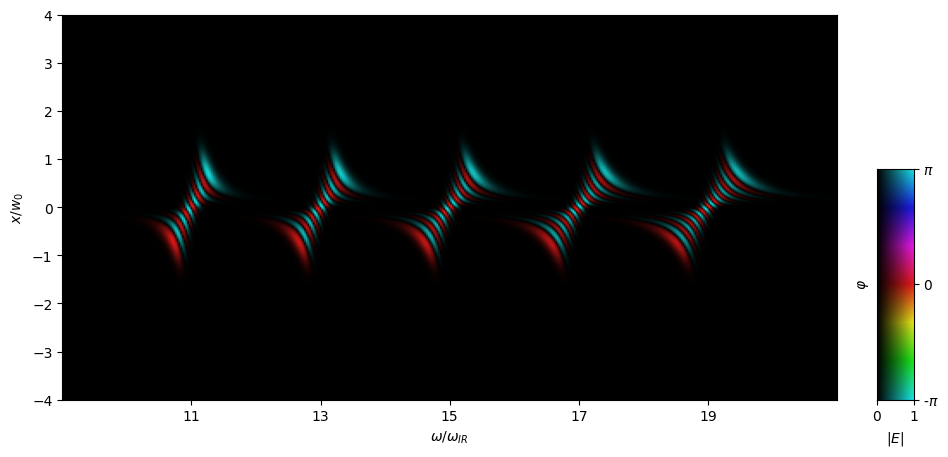

In [172]:
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(10,5))

x, w = xw_grid[0][0], xw_grid[1].T[0] # retrieve axes from meshgrid
x = x/IR.w0
w = w/IR.omega
extent=[w[0], w[-1], x[0], x[-1]]


im = Graph.Phase2D().colorize(XUVspectrum.T)
amp, phase, key = Graph.Phase2D().key_inset()

ax.imshow(im, aspect='auto', extent=extent)

ins = inset_axes(ax, width="100%", height="100%",
                   bbox_to_anchor=(1.05, 0, .05, .6),
                   bbox_transform=ax.transAxes, loc=2, borderpad=0)
ins.imshow(key, extent=[0, 1, -np.pi, np.pi])
ins.tick_params(left=False, right=True, labelleft=False, labelright=True)
ins.set_xticks([0, 1], [0, 1])
ins.set_yticks([-np.pi, 0, np.pi], [r"-$\pi$", 0, r"$\pi$"])
ins.set_xlabel(r'$|E|$')
ins.set_ylabel(r'$\varphi$')

ax.set_xlim(9, 21)
ax.set_ylim(-4, 4)

ax.set_xlabel(r'$\omega/\omega_{IR}$')
ax.set_ylabel(r'$x/w_0$')

ax.set_xticks([11, 13, 15, 17, 19], [11, 13, 15, 17, 19])

plt.show()